In [10]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from torchvision.utils import make_grid

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- DEFINE THE GENERATOR CLASS ---
# We must define the class structure exactly as it was in my_gan.py 
# so PyTorch knows how to load the weights.
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(1024, 784),
            nn.Tanh()
        )

    def forward(self, z):
        img_flat = self.model(z)
        img = img_flat.view(img_flat.size(0), 1, 28, 28)
        return img

# --- LOAD THE TRAINED MODEL ---
latent_dim = 100
generator = Generator(latent_dim).to(device)

try:
    generator.load_state_dict(torch.load("mnist_generator.pt", map_location=device))
    generator.eval() # Set to evaluation mode
    print("✅ Model loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'mnist_generator.pt' not found. Run 'python my_gan.py' first.")

✅ Model loaded successfully!


--- TASK 2: Training Evolution ---


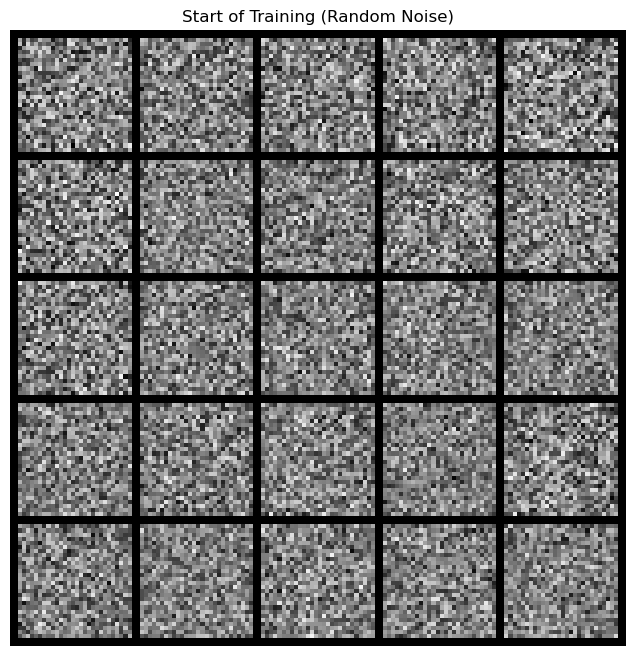

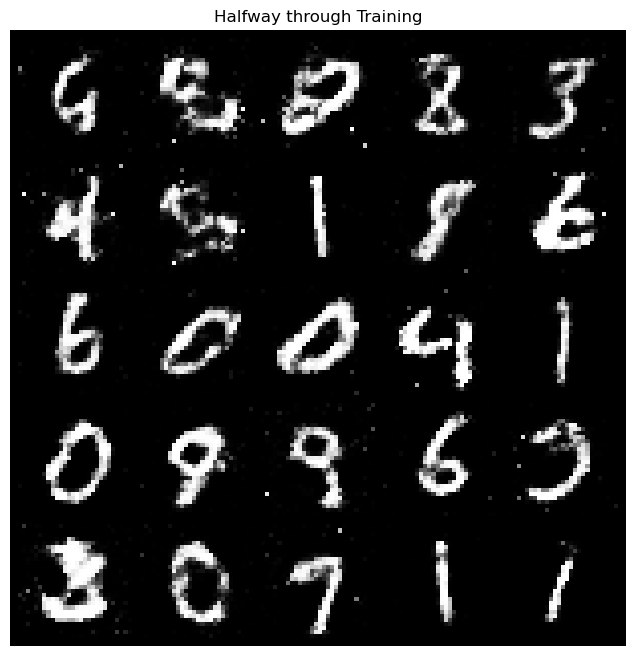

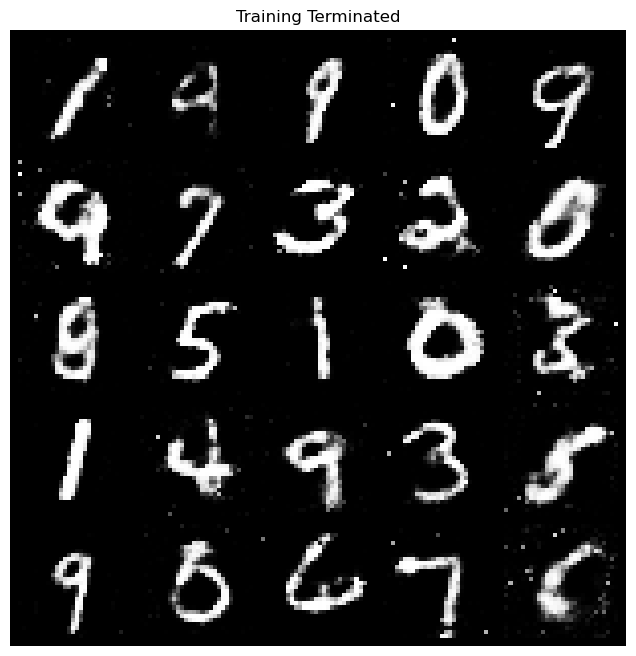

In [11]:
# task 2 requires samples from Start, Middle, and End.
# since we cannot 'un-train' the model, we display the images that were saved during the training process.

def show_saved_image(path, title):
    try:
        img = mpimg.imread(path)
        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
        plt.show()
    except FileNotFoundError:
        print(f"Could not find {path}")

print("--- TASK 2: Training Evolution ---")
show_saved_image('images/task2_start.png', 'Start of Training (Random Noise)')
show_saved_image('images/task2_halfway.png', 'Halfway through Training')
show_saved_image('images/task2_final.png', 'Training Terminated')

--- TASK 3: Latent Space Interpolation ---


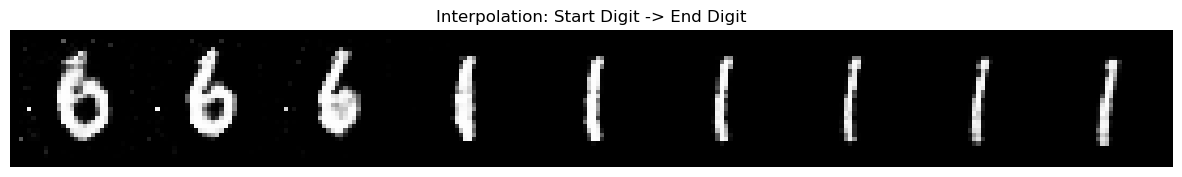

Check: Are the start and end digits different? If not, run this cell again!


In [12]:
# Task 3: Interpolate between 2 digits in latent space.
# we do this LIVE using the loaded model.

print("--- TASK 3: Latent Space Interpolation ---")

# 1. Generate two random vectors (z1 and z2)
z1 = torch.randn(1, latent_dim).to(device)
z2 = torch.randn(1, latent_dim).to(device)

# create the interpolation steps (0% to 100%)
# we need 7 steps in between, so 9 steps total.
alphas = np.linspace(0, 1, 9)

interpolated_z = []
for alpha in alphas:
    # Formula: z' = (1-a)*z1 + a*z2
    v = (1.0 - alpha) * z1 + alpha * z2
    interpolated_z.append(v)

# stack them into a tensor of shape (9, 100)
z_batch = torch.cat(interpolated_z, dim=0)

# generate images
with torch.no_grad():
    generated_imgs = generator(z_batch)

# Move to CPU for plotting, un-normalize (-1,1) -> (0,1)
generated_imgs = generated_imgs.cpu() / 2 + 0.5 

plt.figure(figsize=(15, 5))
grid_img = make_grid(generated_imgs, nrow=9, padding=2).permute(1, 2, 0)
plt.imshow(grid_img)
plt.axis('off')
plt.title("Interpolation: Start Digit -> End Digit")
plt.show()

print("Check: Are the start and end digits different? If not, run this cell again!")